<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# AESB1213 Probability and Statistics Lab
*Developed by Sandra Verhagen*
## Notebook 2: Continuous random variables

In this Notebook, we will have a look at a few well-known continuous distributions. 

Learning objectives:
* evaluate and interpret probability density functions related to uniform, exponential, Pareto and normal distribution
* understand how probabilities can be obtained from given probability density functions

Within the notebook you will need to run each code cell by hitting [SHIFT-ENTER]. We always need to start with importing some libraries, so to get started, run the following code.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas
from scipy.stats import uniform
from scipy.stats import expon
from scipy.stats import pareto
from scipy.stats import norm

### Uniform distribution

After running the code below, the probability density function (pdf) of 2 uniformly distributed random variables will be plotted. On the left you will see the pdf of $X\sim U(0,1)$, on the right the pdf of $Y\sim U(-1,2)$. (The symbol $\sim$ means "is distributed as").

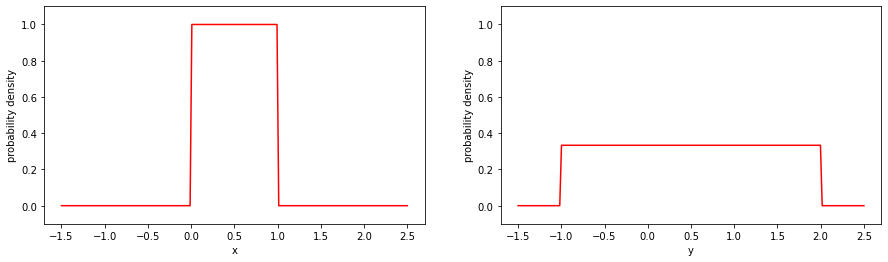

In [9]:
r = np.linspace(-1.5, 2.5, 200)
fx = uniform.pdf(r, loc=0, scale=1)  # if X ~ U(a,b) then loc = a, and scale = b-a
fy = uniform.pdf(r, loc=-1, scale=3)

plt.figure(figsize=(15, 4))

plt.subplot(121)
plt.plot(r, fx, 'r')
plt.xlabel('x')
plt.ylabel('probability density')
plt.ylim([-0.1, 1.1])
plt.subplot(122)
plt.plot(r, fy, 'r')
plt.xlabel('y')
plt.ylabel('probability density')
plt.ylim([-0.1, 1.1]);

#### Questions:
#### 2.1 Why is the probability density between 0 and 1 for random variable $X$ three times as high as for random variable $Y$. 
#### 2.2 What are the probabillities $P(X\geq 0)$ and $P(Y\geq 0)$? 
#### 2.3 What are the probabilities $P(-0.5\leq X\leq 0.5)$ and $P(-0.5\leq Y\leq 0.5)$? 

#### Answers:

2.1 The second and third line of code in the python block above refer to the starting location which for X is 0.0 and Y is -1.0. the scale determines the range on which the pdf's sit where X only takes 1 and as such has a height of 1. the range of the pdf of Y is 3 and as such takes a height of 1/3.

2.2 In the case of the first question $P(X\geq 0)$ all of the values are above 0 which leads to the answer that $P(X\geq 0) = 1$ The second question refers to $P(Y\geq 0)$ in this case 2/3 of the pdf is above 0. this can also be described as 0.67.

2.3 the third question is similar to the second in which $P(-0.5\leq X\leq 0.5)$ calculates the first half of the pdf leading to a final answer of 1/2. for the second question $P(-0.5\leq Y\leq 0.5)$ this is 1/3 or 0.33 of the pdf.

### Exponential distribution

We will model the time interval between two subsequent earthquakes as an exponentially distributed random variable. After running the code below you will see the pdf of the time interval $X_A$ and $X_B$ in country A and B, respectively. For country A we have $X_A\sim \text{Exp}(\lambda_A)$, for country B we have $X_B\sim \text{Exp}(\lambda_B)$.

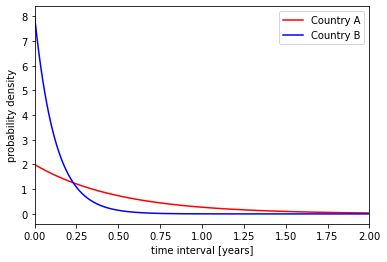

In [31]:
r = np.linspace(0, 2, 500)
fA = expon.pdf(r, loc=0, scale=1/2)
fB = expon.pdf(r, loc=0, scale=1/8)

plt.plot(r, fA, 'r')
plt.plot(r, fB, 'b')
plt.xlabel('time interval [years]')
plt.ylabel('probability density')
plt.legend(['Country A', 'Country B'])
plt.xlim([0, 2]);

#### Questions:
#### 2.5 Give the values for $\lambda_A$ and $\lambda_B$
#### For each statement below EXPLAIN whether it is TRUE or FALSE:
#### 2.6 $P(X_A\leq 0.25) \approx P(X_B\leq 0.25)$
#### 2.7 In country A it is more likely that the time between 2 subsequent earthquakes is very short.
#### 2.8 For large $t$ we have that $P(X_A\geq t)$ > $P(X_B\geq t)$
#### 2.9 The parameter $\lambda_i$ ($i=A,B$) is equal to the average time interval between 2 subsequent earthquakes

#### Answers:

2.5 this derives from the second and third line of code $\lambda_A =$ 1/2  and $\lambda_B =$ 1/8.

2.6 This is `True` the intersecond of $X_A$ and $X_B$ is around 0.25.

2.7 This is `False` since Country a or the red line has a more gentle slope. during the lecture we were thaugt that the exponential distribution has two parts more or less. the body and the tail. the difference caused by the lambda values is that A has a smaller body and bigger tail in comparison to Country B. So the opposite is actually true which makes statement 2.7 False.

2.8 This is `True`. As stated in 2.7 the "body" of function $X_B$ is relativly bigger and in general after the intersection point discussed in 2.6 the probability value of $X_A$ is > than $X_B$ which makes this statement True.

2.9 This is also `False`. the the exponentail distribution is aimed at the waiting time before the next occurance or event not the time between in this case two earthquakes. So this is in fact False.

### Pareto distribution

Let's again import the dataset with information on tectonic earthquakes in The Netherlands (see Notebook 1).

<b>Make sure the excel file is in the same folder as your notebook, with same name as in the code below. 

In [50]:
def load_data(filename): # I had to change this into a function because my VS-code application had trouble
    path = ''
    data = pandas.read_excel(path + filename, engine='openpyxl')
    return data

try:
    EQtec = load_data('Earthquakes_tectonic.xlsx')  
    Mtec = np.array(EQtec['MAG'])
    Dtec = np.array(EQtec['DEPTH'])
except FileNotFoundError:
    print('ERROR!\nFile Earthquakes_induced.xlsx not found')

We will first create the histogram for the magnitude of the tectonic earthquakes. Recall that we may consider the histogram as a crude estimate of the *probability density function*.

In lecture 3 it was mentioned that the distribution of magnitude of earthquakes is sometimes modeled as a Pareto distribution, with pdf:
$$
f(x) = \begin{cases}\frac{\alpha}{x^{\alpha+1}}\quad &\text{for $x\geq 1$}\\0 &\text{for $x< 1$}\end{cases}
$$

Let's see if this distribution indeed fits our data; the pdf of the Pareto distribution with parameter $\alpha$ is plotted in red. Change the value of `alpha` to see if that gives a better/worse fit.

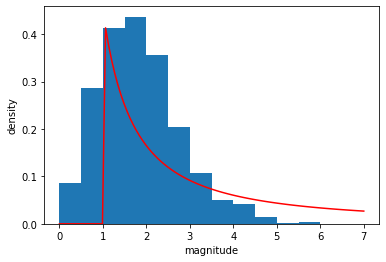

In [60]:
binwidth = 0.5
bine = np.arange(0, 7, binwidth)

alpha = 0.45
r = np.linspace(0, 7, 100)
fx = pareto.pdf(r, alpha)

plt.hist(Mtec, bins=bine, density='True')
plt.plot(r, fx, 'r')
plt.xlabel('magnitude')
plt.ylabel('density');

#### Questions:
#### 2.10 For what value of $\alpha$ do you get the 'best' fit (based on visual comparison of histogram and pdf)?
#### 2.11 Discuss the difference between the histogram and pdf. Do you think the Pareto distribution provides a good model?

#### Answers:

2.10 the best chosen alpha is 0.45 since it matches the bin height. 0.5 can also be choosen since the histogram does reach further above then the 0.45.

2.11 the difference between the histogram and the Pareto is that all value's below 1 get added to the first bin as such these values get quiet high. I do not think the Pareto gives a good model in this case since the intial histogram has to be changed substanially which leads shifted values. I Would say a normal distribution using normalization algorithms would better suit the model.

With a small trick (actually this is cheating...), we could get a better fit. In this case all earthquake magnitudes with a magnitude between 0 and 1 are rounded to 1. Again you can play a bit with the parameter $\alpha$. Note, however, that we do still not get a perfect fit, since the Pareto distribution (model) provides only an approximation of reality. Instead of visually deciding whether the fit is good or not, statistical *tests* can be applied for that purpose. We will learn a bit about testing at the end of the course.

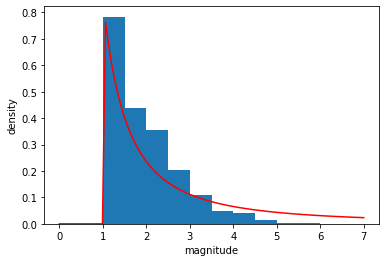

In [48]:
MtecC = Mtec
MtecC[MtecC < 1] = 1

plt.hist(MtecC, bins=bine, density='True')

alpha = 0.85
r = np.linspace(0, 7, 100)
fx = pareto.pdf(r, alpha)

plt.plot(r, fx, 'r')
plt.xlabel('magnitude')
plt.ylabel('density');

### Normal distribution

Remember Leonardo da Vinci's famous drawing where the 'ideal' (or 'average') human fits in a square, i.e., has same height and armspan?

<img src="VitruvianMan.jpg" alt="Vitruvian man" width=400pt>

We will now look at a dataset with heights and armspans of more than 200 TU Delft students (so more male than female students!). Let's first read the data.

In [21]:
def load_data(filename): # Same as earlier I had to change this into a function because my VS code had trouble
    path = ''
    data = pandas.read_excel(path + filename, engine='openpyxl')
    return data

try:
    STUD = load_data('Leonardo.xlsx')  
    H = np.array(STUD['HEIGHT'])  
    A = np.array(STUD['ARMSPAN'])
    S = np.array(STUD['SEX'])      # SEX = 1 means male, SEX = 0 means female
except FileNotFoundError:
    print('ERROR!\nFile Leonardo.xlsx not found')

We will now plot the histograms as well as a 'fitted' pdf, assuming that height $H$ and armspan $A$ are both normally distributed with the same $\mu$ and $\sigma$: $H\sim N(\mu, \sigma^2)$ and $A\sim N(\mu, \sigma^2)$.

We will choose $\mu$ equal to the mean of the data, and $\sigma$ equal to the standard deviation. 

Change the value of `binwidth` to e.g. 1 and 8 to see the influence.

The figure on the right shows the scatterplot of height and armspan.

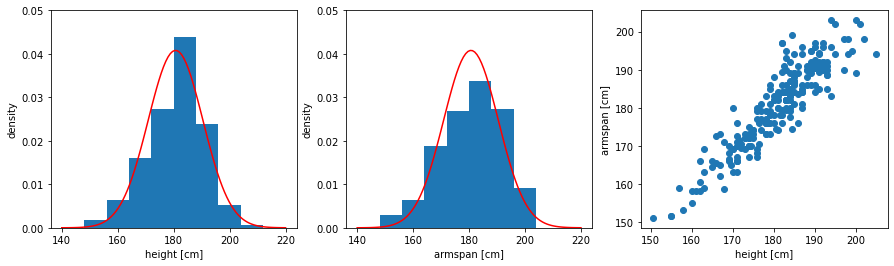

In [62]:
# this is for the histograms
binwidth = 8
binw = np.arange(140, 220, binwidth)

# this is for the pdf (red) of the normal distribution
mu = np.mean(H) # mu is equal to the mean value
sigma = np.std(H, ddof=1) # sigma is equal to the standard deviation
r = np.linspace(140, 220, 100)
fx = norm.pdf(r, loc=mu, scale=sigma)

plt.figure(figsize=(15, 4))

plt.subplot(131)
plt.hist(H, bins=binw, density='True')
plt.plot(r, fx, 'r')
plt.xlabel('height [cm]')
plt.ylabel('density')
plt.ylim([0, 0.05])

plt.subplot(132)
plt.hist(A, bins=binw, density='True')
plt.plot(r, fx, 'r')
plt.xlabel('armspan [cm]')
plt.ylabel('density')
plt.ylim([0, 0.05])

plt.subplot(133)
plt.plot(H, A, 'o')
plt.xlabel('height [cm]')
plt.ylabel('armspan [cm]');

#### Questions:
#### 2.12 Based on the histograms, can we conclude that Leonardo da Vinci was right?
#### 2.13 What do you conclude from the scatterplot?

#### Answers:

2.12 He was kind of right 200 is maybe not enough to correctly summurize all students at the TU delft. but it can be definitly said that the students fit a curve that is starting to resemble a bell curve. 

2.13 That the armspan and height is connected. the taller the student is in height the wider is his armspan.

Let's have a look at the pdf of normally distributed random variables, where we play a bit with the parameters $\mu$ and $\sigma$.

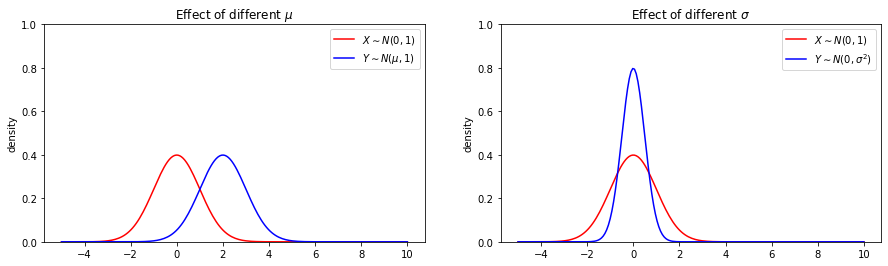

In [23]:
mu = 2 # change to see the effect
sigma = 0.5 # change to see the effect

r = np.linspace(-5, 10, 200)
fx = norm.pdf(r, loc=0, scale=1) # pdf of X ~ N(0,1)
fv = norm.pdf(r, loc=mu, scale=1) # pdf of Y ~ N(mu, 1)
fw = norm.pdf(r, loc=0, scale=sigma) # pdf of Y ~ N(mu, sigma^2)

plt.figure(figsize=(15, 4))

plt.subplot(121)
plt.plot(r, fx, 'r')
plt.plot(r, fv, 'b')
plt.ylabel('density')
plt.ylim([-5, 10])
plt.ylim([0, 1])
plt.legend(['$X\sim N(0,1)$' , '$Y\sim N(\mu,1)$'])
plt.title('Effect of different $\mu$');

plt.subplot(122)
plt.plot(r, fx, 'r')
plt.plot(r, fw, 'b')
plt.ylabel('density')
plt.ylim([-5, 10])
plt.ylim([0, 1])
plt.legend(['$X\sim N(0,1)$' , '$Y\sim N(0,\sigma^2)$'])
plt.title('Effect of different $\sigma$');


Note that the area below the pdf must always be equal to 1. In the figure on the right you can see that with a smaller $\sigma$, the pdf becomes more peaked.

Assume we have $X\sim N(\mu, \sigma^2)$.

#### Question 2.14 Explain whether it is true that with a smaller $\sigma$, there is a higher probability that $X$ is close to $\mu$.

#### Answer:

2.14 This is `True`. As a rule of thumb the sigma indicates the standard deviation from the mean represented by the letter Mu. as such a smaller sigma means a higher peak. as such there is a higher probability that X is closer to the mean in that case.

Finally, we will have a look at a random variable $X\sim N(3,4)$, see the pdf below.

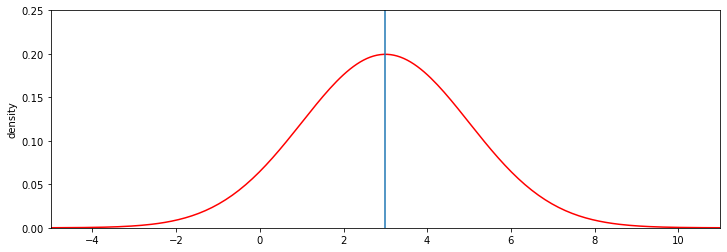

In [24]:
r = np.linspace(-5, 11, 200)
fx = norm.pdf(r, loc=3, scale=2) # pdf of X ~ N(3,4)

plt.figure(figsize=(12, 4))

plt.plot(r, fx, 'r')
plt.plot([3, 3], [0, 0.4])
plt.ylabel('density')
plt.xlim([-5, 11])
plt.ylim([0, 0.25]);

#### Which of the following statements is TRUE or FALSE with short explanation:
#### 2.15 $P(X\leq 0) = P(X \geq 6)$
#### 2.16 $P(X\leq 4) = P(X \leq 2)$
#### 2.17 $P(X\geq 4) = 1 - P(X \leq 4)$ 
#### 2.18 $P(2 \leq X\leq 4) = P(X \leq 4) - P(X \leq 2) = 1 - 2\cdot P(X\leq 2)$

#### Answers:

2.15 `True`, because of symmetry rules everything below 0 is the same as everything above 6 in the bellcurve.

2.16 `False`, the first part of the statement refers to the bellcurve (smaller or below) 4. the second part refers to everything smaller or below 2. If the boolean statement was reversed in either the first or second one but not both the statement would have been correct. However as it is currently shown the statement is `False`. 

2.17 `True`, the first part is everything above 4. the second part is everything below 4 minus 1 which is the same as everything above.

2.18 `True` This is also true for all three parts. the first part describes everything between 2 and 4. the second part is everything smaller than 4 minus everything smaller than 2 which leads to everthing between 2 and 4. the final part is everything below 2 with the symmetry rule it is then multiplied by 2 which means everything below 2 and above 4 which is then subtracted from 1 just like in the second part which leads to everything between 2 and 4.